# 数学期望、方差、矩、协方差和相关系数(Mathematical Expectation、variance、  Moment、  Covariance and correlation coefficient)

## 为什么要研究随机变量的数字特征
----
很多情况下，我们得到的数据不完整或在采集数据的代价过高，我们只能得到一个随机变量的部分信息而无法得到具体的分布函数。这时候，我们想根据有限的数据得出有效的结论就必须利用随机变量的某些数字特征对其局部研究，可以得到整体的认识

常见的数字特征有：
+ 数学期望
+ 方差
+ 矩
+ 协方差和相关系数
+ 中位数
+ 众数等  
(协方差和相关系数三用来表示两个随机变量之间的关系)

## 数学期望
1. 一个随机变量X的数学期望，简称期望，也叫作均值（Mean），记$E(X)$。数学期望与平均值有相类似的方面，简单地说，数学期望就是，可能结果(数据)与可能结果的概率(权重)乘积的**总和**
2. 意义：反映随机变量平均取值的大小(简单理解为：从一组数据中随机抽取一个，可能平均可能取值为$E(X)$   
3. 公式：$E(X) = \displaystyle \sum_{ i = 1 }^{ n } x_i p_i$

例如：一个离散型随机变量X的概率分布律如下：
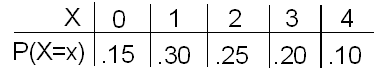

根据定义，可以得出：
$E(X) = \displaystyle \sum_{ i = 1 }^{ n } x_i p_i = 0 \times 0.15 + 1 \times 0.3 + 2 \times 0.25 + 3 \times 0.2 + 4 \times 0.1 = 1.8$


### 数学期望的性质
(a,b,c为常数，X,Y均为随机变量)
1. $E(c) = c $  
2. $E(X+Y) = E(X) + E(Y)$
3. $E(aX+bY+c) = aE(X)+bE(Y)+c$(即：随机变量线性组合的期望等于期望的线性组合。该公式可以推广到任意有限个随机变量线性组合的情况)  
4. 若X，Y**相互独立**，则$E(XY) = E(X)E(Y)$(该公式可以推广到有限多个相互独立的随机变量)

### 数学期望的计算
+ 离散型
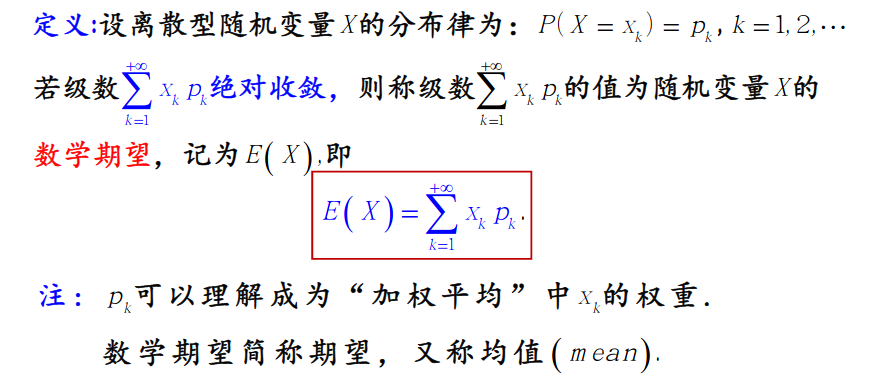
+ 连续型
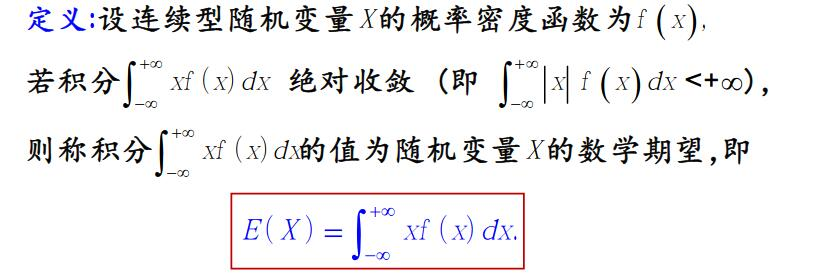


### 常见分布的数学期望
1. 0-1分布，$X \sim B(1,p)$，则$E(X) = p$
2. 二项分布，$X \sim B(1,p)$, 则$E(X) = np$
3. 泊松分布，$X \sim P(\lambda)$, 则$E(x) = \lambda$
4. 几何分布，$X \sim G(p)$, 则$E(x) = 1/p$
5. 均匀分布，$X \sim U(a,b)$, 则$E(x) = \frac{a + b}{2}$
6. 正态分布，$X \sim N(\mu,\sigma^2)$, 则$E(x) = \mu$
7. 指数分布，$X \sim E(\lambda)$, 则$E(x) = \frac{1}{\lambda}$

### 样本均值计算
+ 算数平均值
+ 几何平均值(Geometric Mean )：几何平均数是对各变量值的连乘积开项数次方根
> 几何平均值的用途：  
当您需要确定乘积中的因子平均值时，请使用几何均值，而不是算术均值。例如，要确定投资的平均回报率（第一年赚得 8%，第二年赚得 52%），请计算几何均值 (1.08 * 1.52)1/2 ≈ 1.28（平均回报率为 28%）。

In [16]:
# python 实现
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 计算平均值
x = np.arange(1, 11)
print(x)
mean = np.mean(x)  # 求出数组的平均值
print('x\'s mean:', mean)
print('-'*25+'分割线'+'-'*25)

# 对多维数组求平均值
x2 = np.arange(1,101).reshape((10,10)) # 10 x 10 的数组
mean2 = np.mean(x2)   # 对所有的值求平均值
print('x2\'s mean:', mean2)  
print('-'*25+'分割线'+'-'*25)
      
mean2_axis0 = np.mean(x2, axis=0) # 对所有的列求平均值
print('对所有的列求平均值：',mean2_axis0)
print('-'*25+'分割线'+'-'*25)

# 对空值的处理
x_with_nan = np.hstack((x, np.nan))  # 水平合并
print('x_with_nan：',x_with_nan)
print('-'*25+'分割线'+'-'*25)
mean_with_nan = np.mean(x_with_nan)
print(mean_with_nan)  # 因为有空值，所有得不出结果
print('-'*25+'分割线'+'-'*25)
mean_no_with_nan = np.nanmean(x_with_nan)
print(mean_no_with_nan) # 计算结果时，nan值会被删除，修正

[ 1  2  3  4  5  6  7  8  9 10]
x's mean: 5.5
-------------------------分割线-------------------------
x2's mean: 50.5
-------------------------分割线-------------------------
对所有的列求平均值： [46. 47. 48. 49. 50. 51. 52. 53. 54. 55.]
-------------------------分割线-------------------------
x_with_nan： [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
-------------------------分割线-------------------------
nan
-------------------------分割线-------------------------
5.5


In [22]:
# 计算几何平均值
x2 = np.arange(1, 11)
print(x2)
print('-'*25+'分割线'+'-'*25)
geometric_mean = stats.gmean(x2)  # 得出几何平均值
print(geometric_mean)

[ 1  2  3  4  5  6  7  8  9 10]
-------------------------分割线-------------------------
4.5287286881167645


In [43]:
# 模拟计算数学期望

x = np.arange(-5,15)
# print(x)
p = np.linspace(0,1,20)
print(sum(x*p))

80.0


## 方差
一个随机变量X的方差，刻画了X取值的波动性，是衡量该随机变量取值分散程度的数字特征。方差越大，就表示该随机变量越分散；方差越小，就表示该随机变量越集中。（描述准确度，精确度）

例如：方差越大，就表示该随机变量越分散；方差越小，就表示该随机变量越集中。在实际应用中，例如常见的关于“射击”的例子中，如果一个运动员打靶得分的方差大，就表示该运动员打在靶上的位置比较分散，成绩不稳定；相反则表示打在靶上的位置比较集中，成绩稳定。

### 定义
设$X$是一个随机变量，若$E[X-E(X)]^2$存在，称其为$X$的方差，记做$D(X)$或$Var(X)$,即
<center>$D(X) = Var(X) = E[X-E(X)]^2$</center>

将$\sqrt{D(X)}$记为$\sigma(X)$, 称为$X$的标准差(Standard Deviation)或均方差(Mean Square Error)


### 方差的计算

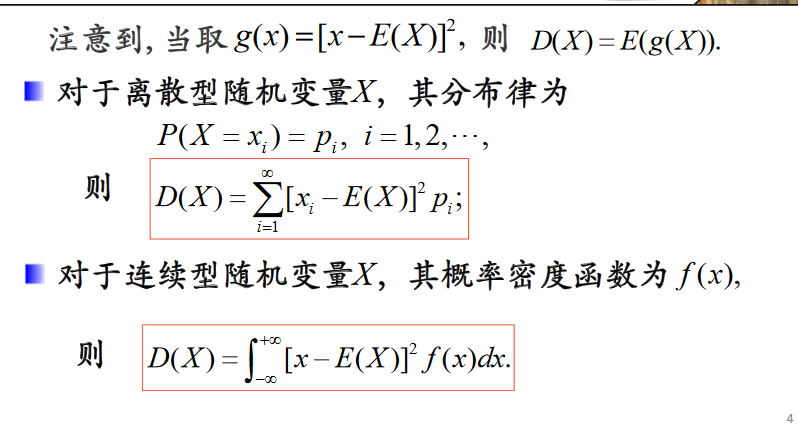


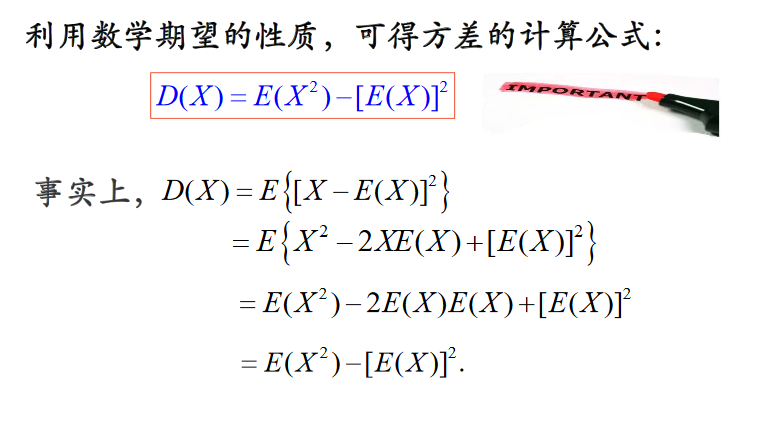

### 方差的性质
(a,b,c为常数，X,Y为随机变量)
1. $D(c) = 0$
2. $D(cX) = c^2D(X)$(特别地,$D(-X) = D(X)$ )
3. $D(X + Y) = D(X)+D(Y)+2Cov(X,Y)$, 其中$Cov(X,Y) = E{[X-E(X)][Y-E(Y)]}$，若X,Y相互独立，则有$D(X+Y) = D(X) + D(Y)$
<br>
综合上述三项，设X,Y相互独立，则
$D(aX+bY+c) = a^2D(x) + b^2D(y)$
<br>
推广到任意有限个**独立**随机变量线性组合的情况  
$D(c_0 + \displaystyle \sum_{i=1}^{n}c_iX_i) = \displaystyle \sum_{i=1}^{n}c_i^2D(X_i)$
其中 $X_i, i=1,2,..,n, 相互独立$
4. $D(X) = 0 <=> P(X=c) = 1，且 c = E(X)$
5. 若X,Y相互独立，则  
$D(XY) = D(X)D(Y) + D(X)[E(Y)]^2 + D(Y)[E(X)]^2$

### 常见分布的方差
+ 0-1分布，$X∼B(1,p)$，则$D(X)=p(1−p)$

+ 二项分布，$X∼B(n,p)$，则$D(X)=np(1−p)$

+ 泊松分布，$X∼P(λ)$，则$D(X)=λ,(λ>0)$，与$E(X)$相同；

+ 几何分布，$X∼G(p)$，则$D(X)=(1−p)/p^2$

+ 均匀分布，$X∼U[a,b]$，则$D(X)=(b−a)^2/12$

+ 正态分布，$X∼N(μ,σ^2)$，则$D(X)=σ^2,(σ>0)$

+ 指数分布，$X∼E(λ)$，则$E(X)=1/λ^2,(λ>0)$，$E(X)$的平方；

### 样本方差的计算

#### 无偏估计
1. 简单定义：估计量的期望等于估计参数的真值
2. 理解
设想一下，想知道全体女性的身高均值$\mu$ ,但是我们没有办法对每个女性进行测量，只能抽一部分人来估计全体女性的身高，那么根据抽样的数据如何进行推断？什么样的推断方法才称得上‘准确’？
<br>
比如：我们得到的样本女性身高为：
<center>${x_1,x_2···,x_n}$</center>
那么，
<br>
<center>$\bar{x} = \frac{x_1+x_2+···+x_n}{n}$</center>
<br>
对于$\mu$来说是一个不错的估计，因为它是无偏估计。(即，$\bar{X}$可以近似的代替$\mu$)
<br>
3. 方差$\sigma^2$的无偏估计    
假设：$\mu$已知，而$\sigma^2$未知
<br>
由方差的定义有(对于单个样本)： <br> 
$E[(X_i - \mu)^2] = \sigma^2, i= 1,2,···,n$
<br>
$=>$
<br>
(对于所有样本)
<br>
$E[\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \mu)^2] = \frac{1}{n}\displaystyle \sum_{i=1}^{n}E(X_i-\mu)^2 = \frac{1}{n} \times n\sigma^2 = \sigma^2$
<br>
$=>$
<br>
$\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \mu)^2$ 是方差$\sigma^2$的一个无偏估计    

这个结果符合直觉，并且在数学上也是显而易见的。  
现在，我们考虑随机变量$X$的数学期望$\mu$是未知的情形。这时，我们会倾向于无脑直接用样本均值$\bar{X}$替换掉上面式子中的$\mu$。这样做有什么后果呢？后果就是，

**如果直接使用$\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \bar{X})^2$作为估计，那么你会倾向于低估方差！**  
这是因为：  
$\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \bar{X})^2 $  
$=\frac{1}{n} \displaystyle \sum_{i=1}^{n}[(X_i - \mu) + (\mu - \bar{x})]^2$   $=\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \mu)^2 + \frac{2}{n} \displaystyle \sum_{i=1}^{n}(X_i -\mu)(\mu-\bar{X})+\frac{1}{n} \displaystyle \sum_{i=1}^{n}(\mu-\bar{X})^2$  
$=\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i -\mu)^2 + 2(\bar{X}-\mu)(\mu-\bar{X})+(\mu-\bar{X}^2)\\= \frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \mu) - (\mu - \bar{X})^2$

换言之，除非正好${\bar{X} = \mu}$，否则我们一定有
$\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \bar{X})^2  < \frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \mu^2 $

这个不等式说明了为什么直接使用$\frac{1}{n} \displaystyle \sum_{i=1}^{n}(X_i - \bar{X})^2 $会导致结果出现偏差

那么，在不知道随机变量真实数学期望的前提下，如何“正确”的估计方差呢？

这就推出样本方差这个概念

#### 样本方差
定义：  
设$X_1,…,X_n$是随机变量X的$n$个样本，则样本方差定义为
$s^2 = \frac{1}{n-1}\displaystyle \sum_{i=1}^{n}(X_i - n\bar{X})^2$  
其中，$\bar{X}为样本均值$  
根据定义可以得出：
$s^2 = \frac{1}{n-1}\displaystyle \sum_{i=1}^{n}(X_i - n\bar{X})^2 \\= \frac{1}{n-1}\displaystyle \sum_{i=1}^{n}(X_i^2 -  2n\bar{X}^2 + \bar{X}^2) \\= \frac{1}{n-1}(\displaystyle \sum_{i=1}^{n}X_i^2 - n\bar{X}^2)$   
无偏性：  
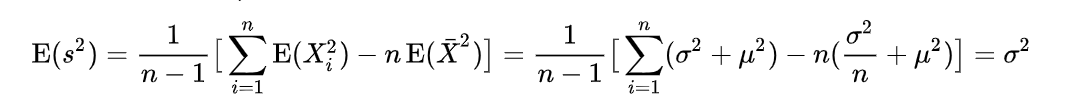  
其中：
$\displaystyle \sum_{i=1}^{n}E(X_i^2) = D(X) + [E(X)]^2 = \sigma^2 + \mu^2$  
$E(\bar{X}^2) = D(\bar{X}) + [E(\bar{X})]^2 = D(\frac{X_1+X_2+…+X_n}{n}) + \mu^2 = \frac{1}{n^2}D(X_1+X_2+…+X_n) + \mu^2 = \frac{1}{n^2}n\sigma^2 + \mu^2 = \frac{\sigma^2}{n} + \mu^2$

下面是如何在Python中计算方差的实现，使用参数ddof（Delta Degrees of Freedom，自由度偏移量）来设置分母的大小。

In [50]:
import numpy as np

data = np.arange(7,14)
print(data)

# 计算方差D(X),Var(X)
# 二阶中心矩，分母为n
var_n = np.var(data)
print(var_n)
print(np.std(data))  # 标准差

# 使用总体方差的无偏估计计算方差，分母为n-1
var_n_1 = np.var(data, ddof=1)  # 使用ddof设置自由度偏移量（即在标准差的基础上乘以1/n-ddof）
print(var_n_1)

# 计算标准差
std_n = np.std(data)
print(std_n)
# 使用ddof设置自由度偏移量
std_n_1 = np.std(data, ddof=1)
print(std_n_1)

[ 7  8  9 10 11 12 13]
4.0
2.0
4.666666666666667
2.0
2.160246899469287
